# Data Science z Python 3.10. Współczynnik uczenia
## 🇬🇧 Data Science with Python 3.10. Learning rate
#### 👨‍🏫 PhD Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

### 1. Import bibliotek
#### 🇬🇧 Import libraries 

In [ ]:
!pip install fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/dataset_x4')
path = Path('/content/drive/My Drive/dataset_x4')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Trenowanie modelu
#### Wykorzystamy teraz kod z poprzednich zajęć do wytrenowania modelu dokonującego prostej klasyfikacji do jednej z dwóch klas. Tym razem wykorzystamy dataset ori_ppmi zawierający zdjęcia osób grających na wybranych instrumentach. Będziemy różnicowali między osobami grającymi na gitarze a osobami grającymi na skrzypcach.
#### 🇬🇧 Model training
#### We will now use the code from the previous lesson to train a model that is able to do simple classification task. This time we will use the ori_ppmi dataset containing photos of people playing selected instruments. We will differentiate between guitar players and violin players.

In [4]:
classes = ['gitara', 'skrzypce']

In [5]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [6]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(max_rotate=2.0)
)
dls = data.dataloaders(path, bs = 32, num_workers = 0)

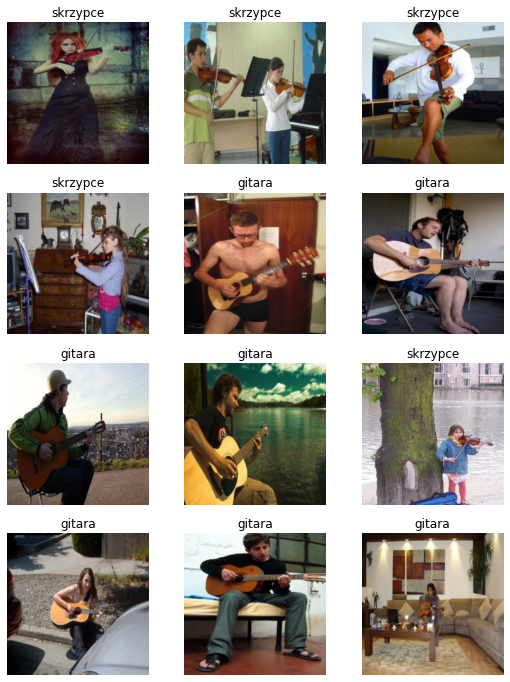

In [7]:
dls.valid.show_batch(max_n=12, nrows=4)

In [8]:
learn = vision_learner(dls, resnet152, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

### 3. Współczynnik uczenia i early stopping w fastai
#### Ostatnim razem wykorzystywaliśmy do tego bibliotekę fastai. Teraz użyjemy jej ponownie, ale sprawdzimy kilka dodatkowych funkcji tej biblioteki. Jedną z nich jest sprawdzenie optymalnego zakresu learning rate (learn.lr_find) oraz wygenerowanie odpowiedniego wykresu (learn.recorder.plot).
#### Czym właściwie jest learning rate (pol. współczynnik uczenia)? Jak wiemy, sieci neuronowe uczą się zmieniając swoje wagi połączeń między neuronami. Jeżeli sieć „idzie w dobrym kierunku” (czyli wagi są prawidłowo aktualizowane) to maleje błąd. Learning rate jest wartością, którą modyfikuje w jak dużym stopniu chcemy dokonać modyfikacji wag naszej sieci. Jeżeli wartość ta będzie zbyt duża, to sieć będzie zbyt dynamicznie aktualizowała swoje wagi i proces uczenia się będzie niestabilny. Jeżeli wartość ta będzie zbyt mała, to sieć będzie uczyła się zbyt wolno.
#### Więcej informacji dotyczących implementacji learning rate znajdziesz tutaj - https://fastai1.fast.ai/callbacks.lr_finder.html

#### 🇬🇧 Learning rate and early stopping in fastai

#### Last time we used the fastai library. During todays lesson we are going to use it again, but first we will check a few extra features. One of them is the optimal value in learning rate (learn.lr_find) and chart (learn.recorder.plot).
#### What exactly is learning rate? As we know, neural networks learn by changing their weights of connections between neurons. If the network is "going in the right direction" (the weights are correctly updated), the error is reduced. Learning rate is a value which it modifies the weights of our network. If this value is too high, the network will update its weights too dynamically and the learning process will be unstable. If this value is too small, the network will learn too slowly.
#### More information on the learning rate implementation can be found here - https://fastai1.fast.ai/callbacks.lr_finder.html

In [ ]:
# learn.fit(2)
# learn.save('stage-1')
# learn.lr_find()
# learn.recorder.plot()
# learn.fit(5, 5e-2)
# learn.save('stage-2')

### 📚 Zadanie
##### 1. Przeprowadź trening sieci neuronowej przy wykorzystaniu early stoppingu (10 epok, patience = 5), zapisz model jako „stage-1”, wygeneruj macierz pomyłek (confusion matrix), oblicz wielkość F-1.
##### 2. Przeprowadź trening sieci neuronowej przy wykorzystaniu early stoppingu (10 epok, patience = 5), zapisz model jako „stage-2”, wygeneruj macierz pomyłek (confusion matrix), oblicz wielkość F-1, ale tym razem przeprowadź uczenie z wykorzystaniem optymalnego learning rate.
##### 3. Porównaj uzyskane wyniki. Który model jest lepszy?
###### Notatka: Implementacja early stopping w fastai jest prosta. Wystarczy, że do kodu związanego z trenowaniem modelu obok liczby epok, optymalnego zakresu learning rate, wprowadzisz nową zmienną cbs, która przyjmie EarlyStoppingCallback oraz SaveModelCallback.

### 🇬🇧 Task
##### 1. Perform neural network training using early stopping (10 epochs, patience = 5), save the model as "stage-1", generate a confusion matrix, calculate the value of F-1.
##### 2. Perform neural network training using early stopping (10 epochs, patience = 5), save the model as "stage-2", generate a confusion matrix, calculate the value of F-1, but this time using the optimal learning rate.
##### 3. Compare the obtained results. Which model is better?
###### Note: Implementation of early stopping in fastai library is simple. All you need to do is to enter a new cbs variable, which will adopt EarlyStoppingCallback and SaveModelCallback, to the code related to training the model, next to the number of epochs and the optimal learning rate range.

In [12]:
learn.fit(10)
learn.save('stage-1')

epoch,train_loss,valid_loss,accuracy,time
0,0.033156,0.165745,0.948052,00:17
1,0.021761,0.148241,0.948052,00:17
2,0.033570,0.196541,0.948052,00:17
3,0.029837,0.202949,0.961039,00:17
4,0.028330,0.239361,0.948052,00:17
5,0.024181,0.259150,0.948052,00:17
6,0.036284,0.351705,0.961039,00:17
7,0.034256,0.113886,0.987013,00:17
8,0.029500,0.116192,0.974026,00:17
9,0.033402,0.181649,0.948052,00:17


Path('models/stage-1.pth')

SuggestedLRs(valley=9.999999747378752e-06)

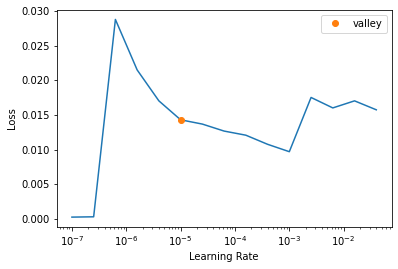

In [13]:
learn.lr_find(stop_div=False, num_it=20)

In [25]:
learn.fit(10, lr = 10e-6, cbs=[EarlyStoppingCallback(monitor='accuracy', patience=5), SaveModelCallback(monitor='accuracy')])
learn.save('stage-2')

epoch,train_loss,valid_loss,accuracy,time
0,0.009605,0.139516,0.935065,00:16
1,0.007328,0.159022,0.935065,00:17
2,0.006740,0.179682,0.935065,00:16
3,0.010615,0.143838,0.935065,00:17
4,0.020817,0.173511,0.935065,00:18
5,0.019820,0.130148,0.935065,00:17


Better model found at epoch 0 with accuracy value: 0.9350649118423462.
No improvement since epoch 0: early stopping


Path('models/stage-2.pth')

In [26]:
interp = Interpretation.from_learner(learn)